<a href="https://colab.research.google.com/github/aarohishaiva/CNN_final-Project/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install PyTorch
!pip install torch torchvision

# Install scikit-learn (for precision, recall, and F1-score calculations)
!pip install scikit-learn

# Install matplotlib (for plotting)
!pip install matplotlib

# Install tqdm (for progress bar)
!pip install tqdm


Training LeNet-5 Model:


100%|██████████| 938/938 [00:27<00:00, 34.67it/s]


Epoch [1/5], Train Loss: 0.2472, Test Loss: 0.0632, Accuracy: 0.9813, Precision: 0.9815, Recall: 0.9813, F1-score: 0.9813


100%|██████████| 938/938 [00:27<00:00, 34.67it/s]


Epoch [2/5], Train Loss: 0.0658, Test Loss: 0.0469, Accuracy: 0.9841, Precision: 0.9842, Recall: 0.9841, F1-score: 0.9841


100%|██████████| 938/938 [00:26<00:00, 35.30it/s]


Epoch [3/5], Train Loss: 0.0450, Test Loss: 0.0463, Accuracy: 0.9845, Precision: 0.9847, Recall: 0.9845, F1-score: 0.9845


100%|██████████| 938/938 [00:26<00:00, 35.25it/s]


Epoch [4/5], Train Loss: 0.0357, Test Loss: 0.0380, Accuracy: 0.9867, Precision: 0.9868, Recall: 0.9867, F1-score: 0.9867


100%|██████████| 938/938 [00:26<00:00, 35.74it/s]


Epoch [5/5], Train Loss: 0.0305, Test Loss: 0.0273, Accuracy: 0.9911, Precision: 0.9911, Recall: 0.9911, F1-score: 0.9911


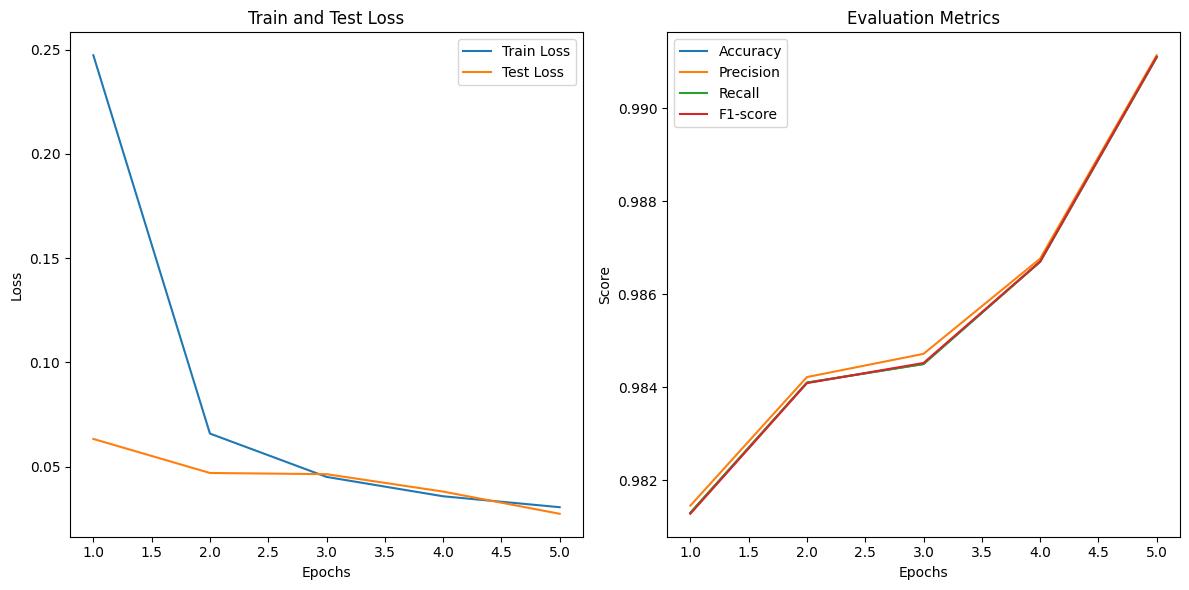

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
from tqdm import tqdm

# LeNet-5 Model Definition
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Load MNIST Dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Training Function
def train_model(model, train_loader, test_loader, num_epochs=5):
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    train_losses = []
    test_losses = []
    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_list = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in tqdm(train_loader):
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        train_losses.append(running_loss / len(train_loader))

        # Validation
        model.eval()
        test_loss = 0.0
        all_preds = []
        all_labels = []
        with torch.no_grad():
            for images, labels in test_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                test_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
        test_losses.append(test_loss / len(test_loader))

        # Calculate Metrics
        all_preds = np.array(all_preds)
        all_labels = np.array(all_labels)
        accuracy = (all_preds == all_labels).mean()
        precision = precision_score(all_labels, all_preds, average='weighted')
        recall = recall_score(all_labels, all_preds, average='weighted')
        f1 = f1_score(all_labels, all_preds, average='weighted')

        # Append Metrics
        accuracy_list.append(accuracy)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)

        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

    # Compile metrics
    metrics = {
        "accuracy": accuracy_list,
        "precision": precision_list,
        "recall": recall_list,
        "f1_score": f1_list
    }
    return train_losses, test_losses, metrics

# Plotting Function
def plot_metrics(train_losses, test_losses, metrics):
    epochs = range(1, len(train_losses) + 1)

    # Loss Plot
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label="Train Loss")
    plt.plot(epochs, test_losses, label="Test Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Train and Test Loss")
    plt.legend()

    # Metrics Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, metrics["accuracy"], label="Accuracy")
    plt.plot(epochs, metrics["precision"], label="Precision")
    plt.plot(epochs, metrics["recall"], label="Recall")
    plt.plot(epochs, metrics["f1_score"], label="F1-score")
    plt.xlabel("Epochs")
    plt.ylabel("Score")
    plt.title("Evaluation Metrics")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Initialize and Train the Model
lenet5_model = LeNet5()
print("Training LeNet-5 Model:")
train_losses, test_losses, metrics = train_model(lenet5_model, train_loader, test_loader, num_epochs=5)

# Plot the curves
plot_metrics(train_losses, test_losses, metrics)


Training Simplified AlexNet Model:


100%|██████████| 938/938 [02:10<00:00,  7.18it/s]


Epoch [1/5], Train Loss: 0.1567, Test Loss: 0.0670, Accuracy: 0.9792, Precision: 0.9796, Recall: 0.9792, F1-score: 0.9791


100%|██████████| 938/938 [02:08<00:00,  7.32it/s]


Epoch [2/5], Train Loss: 0.0602, Test Loss: 0.0334, Accuracy: 0.9892, Precision: 0.9893, Recall: 0.9892, F1-score: 0.9892


100%|██████████| 938/938 [02:09<00:00,  7.26it/s]


Epoch [3/5], Train Loss: 0.0443, Test Loss: 0.0294, Accuracy: 0.9895, Precision: 0.9895, Recall: 0.9895, F1-score: 0.9895


100%|██████████| 938/938 [02:11<00:00,  7.16it/s]


Epoch [4/5], Train Loss: 0.0366, Test Loss: 0.0264, Accuracy: 0.9907, Precision: 0.9907, Recall: 0.9907, F1-score: 0.9907


100%|██████████| 938/938 [02:07<00:00,  7.36it/s]


Epoch [5/5], Train Loss: 0.0310, Test Loss: 0.0242, Accuracy: 0.9929, Precision: 0.9929, Recall: 0.9929, F1-score: 0.9929


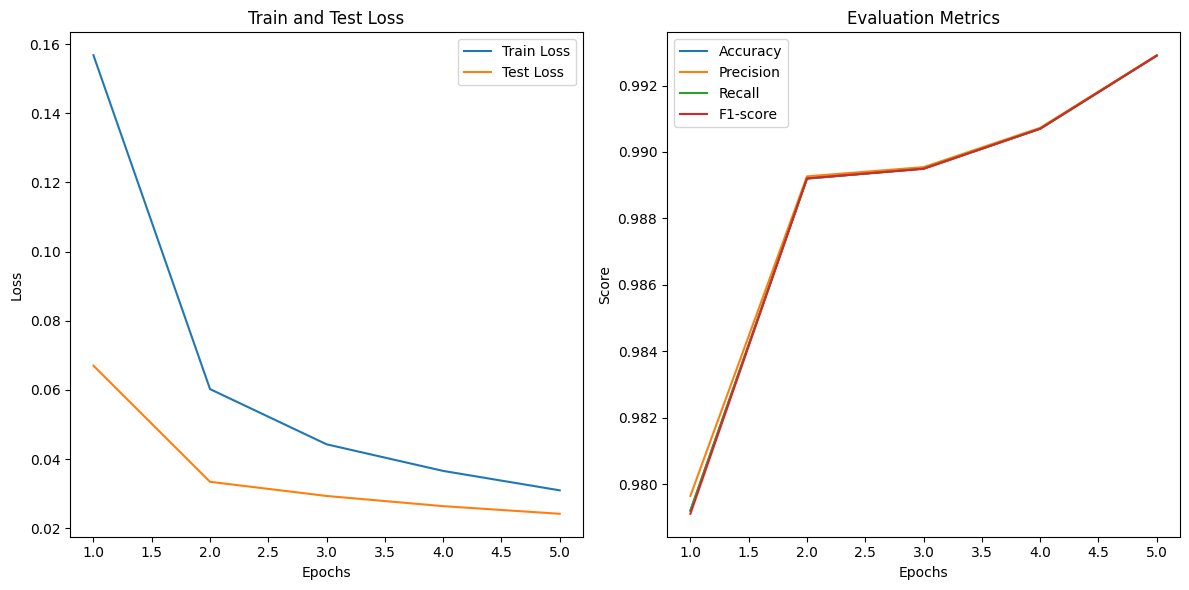

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
from tqdm import tqdm

# Simplified AlexNet Model Definition
class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(64 * 7 * 7, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, 10),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# Load MNIST Dataset
transform = transforms.Compose([transforms.Resize((28, 28)), transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Training Function
def train_model(model, train_loader, test_loader, num_epochs=5):
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    train_losses = []
    test_losses = []
    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_list = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in tqdm(train_loader):
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        train_losses.append(running_loss / len(train_loader))

        # Validation
        model.eval()
        test_loss = 0.0
        all_preds = []
        all_labels = []
        with torch.no_grad():
            for images, labels in test_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                test_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
        test_losses.append(test_loss / len(test_loader))

        # Calculate Metrics
        all_preds = np.array(all_preds)
        all_labels = np.array(all_labels)
        accuracy = (all_preds == all_labels).mean()
        precision = precision_score(all_labels, all_preds, average='weighted')
        recall = recall_score(all_labels, all_preds, average='weighted')
        f1 = f1_score(all_labels, all_preds, average='weighted')

        # Append Metrics
        accuracy_list.append(accuracy)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)

        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

    # Compile metrics
    metrics = {
        "accuracy": accuracy_list,
        "precision": precision_list,
        "recall": recall_list,
        "f1_score": f1_list
    }
    return train_losses, test_losses, metrics

# Plotting Function
def plot_metrics(train_losses, test_losses, metrics):
    epochs = range(1, len(train_losses) + 1)

    # Loss Plot
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label="Train Loss")
    plt.plot(epochs, test_losses, label="Test Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Train and Test Loss")
    plt.legend()

    # Metrics Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, metrics["accuracy"], label="Accuracy")
    plt.plot(epochs, metrics["precision"], label="Precision")
    plt.plot(epochs, metrics["recall"], label="Recall")
    plt.plot(epochs, metrics["f1_score"], label="F1-score")
    plt.xlabel("Epochs")
    plt.ylabel("Score")
    plt.title("Evaluation Metrics")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Initialize and Train the Model
simple_alexnet_model = AlexNet()
print("Training Simplified AlexNet Model:")
train_losses, test_losses, metrics = train_model(simple_alexnet_model, train_loader, test_loader, num_epochs=5)

# Plot the curves
plot_metrics(train_losses, test_losses, metrics)


Training Simplified GoogLeNet Model:


100%|██████████| 938/938 [01:48<00:00,  8.61it/s]


Epoch [1/5], Train Loss: 0.2004, Test Loss: 0.0553, Accuracy: 0.9812, Precision: 0.9813, Recall: 0.9812, F1-score: 0.9812


100%|██████████| 938/938 [01:47<00:00,  8.75it/s]


Epoch [2/5], Train Loss: 0.0624, Test Loss: 0.0605, Accuracy: 0.9800, Precision: 0.9804, Recall: 0.9800, F1-score: 0.9800


100%|██████████| 938/938 [01:47<00:00,  8.73it/s]


Epoch [3/5], Train Loss: 0.0471, Test Loss: 0.0472, Accuracy: 0.9852, Precision: 0.9856, Recall: 0.9852, F1-score: 0.9852


100%|██████████| 938/938 [01:47<00:00,  8.76it/s]


Epoch [4/5], Train Loss: 0.0384, Test Loss: 0.0422, Accuracy: 0.9860, Precision: 0.9861, Recall: 0.9860, F1-score: 0.9860


100%|██████████| 938/938 [01:47<00:00,  8.73it/s]


Epoch [5/5], Train Loss: 0.0315, Test Loss: 0.0341, Accuracy: 0.9879, Precision: 0.9880, Recall: 0.9879, F1-score: 0.9879


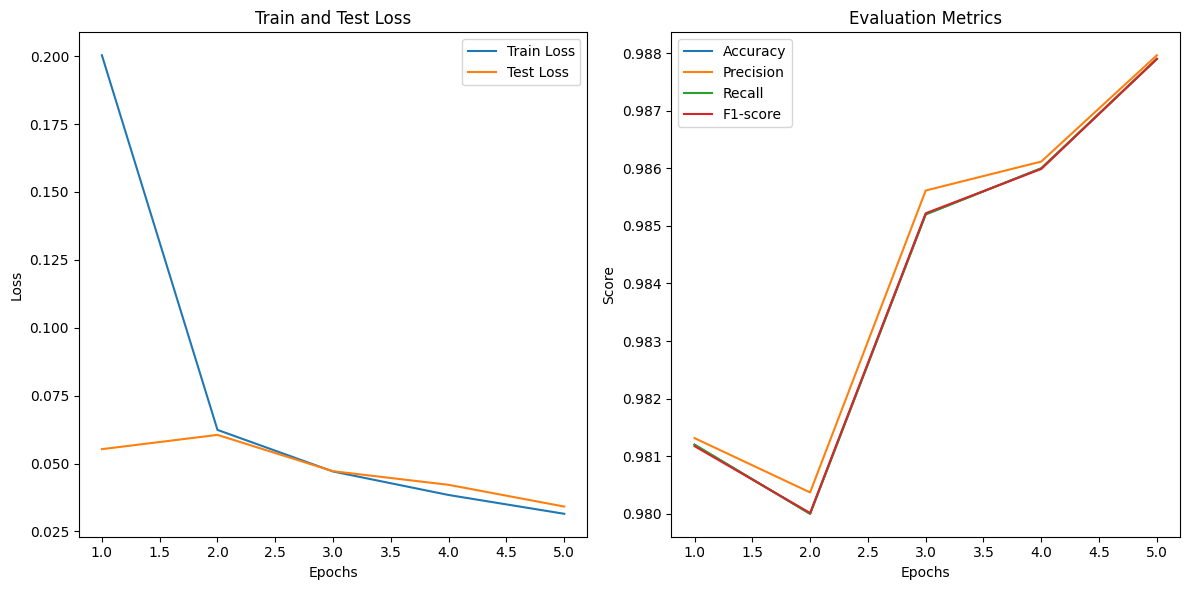

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
from tqdm import tqdm

# Define a basic Inception Block
class InceptionBlock(nn.Module):
    def __init__(self, in_channels):
        super(InceptionBlock, self).__init__()
        # 1x1 convolution
        self.branch1 = nn.Conv2d(in_channels, 16, kernel_size=1)

        # 1x1 convolution followed by 3x3 convolution
        self.branch2 = nn.Sequential(
            nn.Conv2d(in_channels, 16, kernel_size=1),
            nn.Conv2d(16, 24, kernel_size=3, padding=1)
        )

        # 1x1 convolution followed by 5x5 convolution
        self.branch3 = nn.Sequential(
            nn.Conv2d(in_channels, 16, kernel_size=1),
            nn.Conv2d(16, 24, kernel_size=5, padding=2)
        )

        # 3x3 max pooling followed by 1x1 convolution
        self.branch4 = nn.Sequential(
            nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
            nn.Conv2d(in_channels, 24, kernel_size=1)
        )

    def forward(self, x):
        branch1 = self.branch1(x)
        branch2 = self.branch2(x)
        branch3 = self.branch3(x)
        branch4 = self.branch4(x)
        # Concatenate all branches
        outputs = torch.cat([branch1, branch2, branch3, branch4], 1)
        return outputs

# Simplified GoogLeNet Model
class GoogLeNet(nn.Module):
    def __init__(self):
        super(GoogLeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3)
        self.maxpool1 = nn.MaxPool2d(3, stride=2, padding=1)

        self.inception1 = InceptionBlock(64)
        self.inception2 = InceptionBlock(88)

        self.avgpool = nn.AdaptiveAvgPool2d((4, 4))
        self.fc = nn.Linear(88 * 4 * 4, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.maxpool1(x)

        x = self.inception1(x)
        x = self.inception2(x)

        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# Load MNIST Dataset
transform = transforms.Compose([transforms.Resize((28, 28)), transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Training Function
def train_model(model, train_loader, test_loader, num_epochs=5):
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    train_losses = []
    test_losses = []
    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_list = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in tqdm(train_loader):
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        train_losses.append(running_loss / len(train_loader))

        # Validation
        model.eval()
        test_loss = 0.0
        all_preds = []
        all_labels = []
        with torch.no_grad():
            for images, labels in test_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                test_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
        test_losses.append(test_loss / len(test_loader))

        # Calculate Metrics
        all_preds = np.array(all_preds)
        all_labels = np.array(all_labels)
        accuracy = (all_preds == all_labels).mean()
        precision = precision_score(all_labels, all_preds, average='weighted')
        recall = recall_score(all_labels, all_preds, average='weighted')
        f1 = f1_score(all_labels, all_preds, average='weighted')

        # Append Metrics
        accuracy_list.append(accuracy)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)

        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

    # Compile metrics
    metrics = {
        "accuracy": accuracy_list,
        "precision": precision_list,
        "recall": recall_list,
        "f1_score": f1_list
    }
    return train_losses, test_losses, metrics

# Plotting Function
def plot_metrics(train_losses, test_losses, metrics):
    epochs = range(1, len(train_losses) + 1)

    # Loss Plot
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label="Train Loss")
    plt.plot(epochs, test_losses, label="Test Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Train and Test Loss")
    plt.legend()

    # Metrics Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, metrics["accuracy"], label="Accuracy")
    plt.plot(epochs, metrics["precision"], label="Precision")
    plt.plot(epochs, metrics["recall"], label="Recall")
    plt.plot(epochs, metrics["f1_score"], label="F1-score")
    plt.xlabel("Epochs")
    plt.ylabel("Score")
    plt.title("Evaluation Metrics")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Initialize and Train the Model
simple_googlenet_model = GoogLeNet()
print("Training Simplified GoogLeNet Model:")
train_losses, test_losses, metrics = train_model(simple_googlenet_model, train_loader, test_loader, num_epochs=5)

# Plot the curves
plot_metrics(train_losses, test_losses, metrics)


Training Simplified VGGNet Model:


100%|██████████| 938/938 [14:20<00:00,  1.09it/s]


Epoch [1/5], Train Loss: 0.2045, Test Loss: 0.0370, Accuracy: 0.9892, Precision: 0.9893, Recall: 0.9892, F1-score: 0.9892


100%|██████████| 938/938 [14:36<00:00,  1.07it/s]


Epoch [2/5], Train Loss: 0.0438, Test Loss: 0.0335, Accuracy: 0.9895, Precision: 0.9896, Recall: 0.9895, F1-score: 0.9895


100%|██████████| 938/938 [14:43<00:00,  1.06it/s]


Epoch [3/5], Train Loss: 0.0298, Test Loss: 0.0320, Accuracy: 0.9905, Precision: 0.9906, Recall: 0.9905, F1-score: 0.9905


100%|██████████| 938/938 [14:47<00:00,  1.06it/s]


Epoch [4/5], Train Loss: 0.0231, Test Loss: 0.0249, Accuracy: 0.9930, Precision: 0.9930, Recall: 0.9930, F1-score: 0.9930


100%|██████████| 938/938 [14:39<00:00,  1.07it/s]


Epoch [5/5], Train Loss: 0.0203, Test Loss: 0.0264, Accuracy: 0.9936, Precision: 0.9936, Recall: 0.9936, F1-score: 0.9936


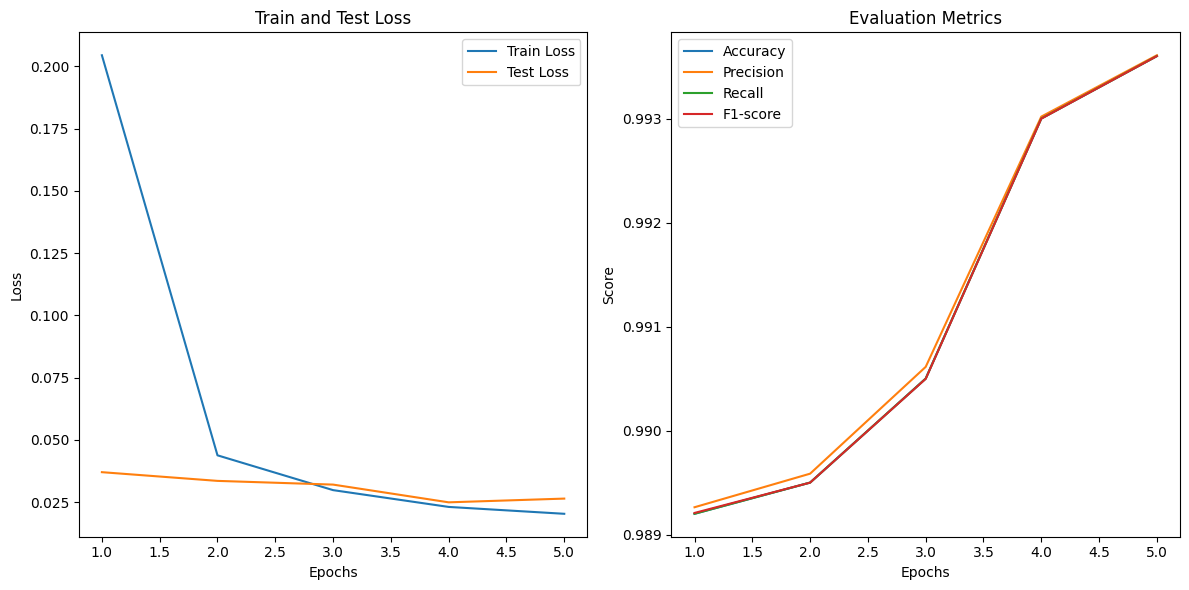

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
from tqdm import tqdm

# Define a simplified VGG-like model
class VGGNet(nn.Module):
    def __init__(self):
        super(VGGNet, self).__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.conv_block2 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.conv_block3 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.fc1 = nn.Linear(256 * 3 * 3, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = self.conv_block3(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load MNIST Dataset
transform = transforms.Compose([transforms.Resize((28, 28)), transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Training Function
def train_model(model, train_loader, test_loader, num_epochs=5):
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    train_losses = []
    test_losses = []
    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_list = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in tqdm(train_loader):
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        train_losses.append(running_loss / len(train_loader))

        # Validation
        model.eval()
        test_loss = 0.0
        all_preds = []
        all_labels = []
        with torch.no_grad():
            for images, labels in test_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                test_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
        test_losses.append(test_loss / len(test_loader))

        # Calculate Metrics
        all_preds = np.array(all_preds)
        all_labels = np.array(all_labels)
        accuracy = (all_preds == all_labels).mean()
        precision = precision_score(all_labels, all_preds, average='weighted')
        recall = recall_score(all_labels, all_preds, average='weighted')
        f1 = f1_score(all_labels, all_preds, average='weighted')

        # Append Metrics
        accuracy_list.append(accuracy)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)

        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

    # Compile metrics
    metrics = {
        "accuracy": accuracy_list,
        "precision": precision_list,
        "recall": recall_list,
        "f1_score": f1_list
    }
    return train_losses, test_losses, metrics

# Plotting Function
def plot_metrics(train_losses, test_losses, metrics):
    epochs = range(1, len(train_losses) + 1)

    # Loss Plot
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label="Train Loss")
    plt.plot(epochs, test_losses, label="Test Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Train and Test Loss")
    plt.legend()

    # Metrics Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, metrics["accuracy"], label="Accuracy")
    plt.plot(epochs, metrics["precision"], label="Precision")
    plt.plot(epochs, metrics["recall"], label="Recall")
    plt.plot(epochs, metrics["f1_score"], label="F1-score")
    plt.xlabel("Epochs")
    plt.ylabel("Score")
    plt.title("Evaluation Metrics")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Initialize and Train the Model
simple_vggnet_model = VGGNet()
print("Training Simplified VGGNet Model:")
train_losses, test_losses, metrics = train_model(simple_vggnet_model, train_loader, test_loader, num_epochs=5)

# Plot the curves
plot_metrics(train_losses, test_losses, metrics)


Training Simple ResNet Model:


100%|██████████| 938/938 [40:38<00:00,  2.60s/it]


Epoch [1/5], Train Loss: 0.1024, Test Loss: 0.0661, Accuracy: 0.9781, Precision: 0.9786, Recall: 0.9781, F1-score: 0.9781


100%|██████████| 938/938 [40:38<00:00,  2.60s/it]


Epoch [2/5], Train Loss: 0.0402, Test Loss: 0.0280, Accuracy: 0.9907, Precision: 0.9908, Recall: 0.9907, F1-score: 0.9907


100%|██████████| 938/938 [40:37<00:00,  2.60s/it]


Epoch [3/5], Train Loss: 0.0305, Test Loss: 0.0213, Accuracy: 0.9925, Precision: 0.9925, Recall: 0.9925, F1-score: 0.9925


100%|██████████| 938/938 [41:10<00:00,  2.63s/it]


Epoch [4/5], Train Loss: 0.0259, Test Loss: 0.0282, Accuracy: 0.9906, Precision: 0.9907, Recall: 0.9906, F1-score: 0.9906


100%|██████████| 938/938 [40:46<00:00,  2.61s/it]


Epoch [5/5], Train Loss: 0.0236, Test Loss: 0.0198, Accuracy: 0.9933, Precision: 0.9933, Recall: 0.9933, F1-score: 0.9933


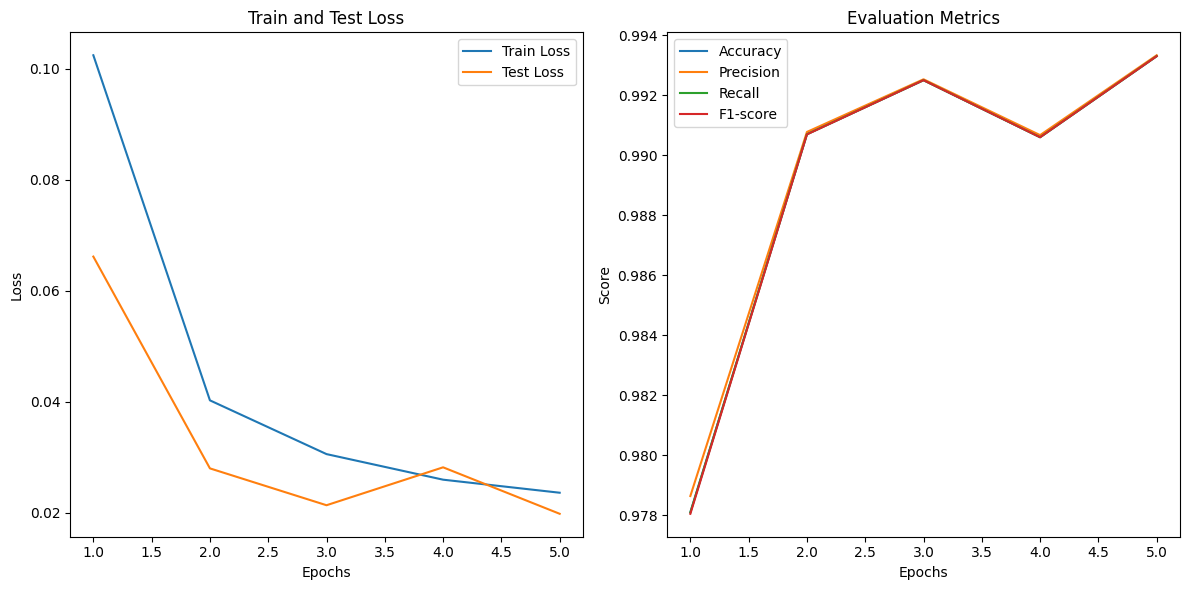

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Define a Residual Block
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)

        # Shortcut connection to match dimensions if needed
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        identity = self.shortcut(x)
        x = torch.relu(self.bn1(self.conv1(x)))
        x = self.bn2(self.conv2(x))
        x += identity
        return torch.relu(x)

# Define the ResNet Model
class ResNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet, self).__init__()
        self.conv = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1)
        self.bn = nn.BatchNorm2d(64)
        self.layer1 = self._make_layer(64, 64, stride=1)
        self.layer2 = self._make_layer(64, 128, stride=2)
        self.layer3 = self._make_layer(128, 256, stride=2)
        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(256, num_classes)

    def _make_layer(self, in_channels, out_channels, stride):
        layer = [
            ResidualBlock(in_channels, out_channels, stride),
            ResidualBlock(out_channels, out_channels, stride=1)
        ]
        return nn.Sequential(*layer)

    def forward(self, x):
        x = torch.relu(self.bn(self.conv(x)))
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.avg_pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# Load MNIST Dataset
transform = transforms.Compose([transforms.Resize((28, 28)), transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Training Function
def train_model(model, train_loader, test_loader, num_epochs=5):
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    train_losses = []
    test_losses = []
    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_list = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in tqdm(train_loader):
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        train_losses.append(running_loss / len(train_loader))

        # Validation
        model.eval()
        test_loss = 0.0
        all_preds = []
        all_labels = []
        with torch.no_grad():
            for images, labels in test_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                test_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
        test_losses.append(test_loss / len(test_loader))

        # Calculate Metrics
        all_preds = np.array(all_preds)
        all_labels = np.array(all_labels)
        accuracy = (all_preds == all_labels).mean()
        precision = precision_score(all_labels, all_preds, average='weighted')
        recall = recall_score(all_labels, all_preds, average='weighted')
        f1 = f1_score(all_labels, all_preds, average='weighted')

        # Append Metrics
        accuracy_list.append(accuracy)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)

        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

    # Compile metrics
    metrics = {
        "accuracy": accuracy_list,
        "precision": precision_list,
        "recall": recall_list,
        "f1_score": f1_list
    }
    return train_losses, test_losses, metrics

# Plotting Function
def plot_metrics(train_losses, test_losses, metrics):
    epochs = range(1, len(train_losses) + 1)

    # Loss Plot
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label="Train Loss")
    plt.plot(epochs, test_losses, label="Test Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Train and Test Loss")
    plt.legend()

    # Metrics Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, metrics["accuracy"], label="Accuracy")
    plt.plot(epochs, metrics["precision"], label="Precision")
    plt.plot(epochs, metrics["recall"], label="Recall")
    plt.plot(epochs, metrics["f1_score"], label="F1-score")
    plt.xlabel("Epochs")
    plt.ylabel("Score")
    plt.title("Evaluation Metrics")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Initialize and Train the Model
simple_resnet_model = ResNet()
print("Training Simple ResNet Model:")
train_losses, test_losses, metrics = train_model(simple_resnet_model, train_loader, test_loader, num_epochs=5)

# Plot the curves
plot_metrics(train_losses, test_losses, metrics)


Training  Xception Model:


100%|██████████| 938/938 [09:35<00:00,  1.63it/s]


Epoch [1/5], Train Loss: 1.4881, Test Loss: 0.6011, Accuracy: 0.8115, Precision: 0.8302, Recall: 0.8115, F1-score: 0.8133


100%|██████████| 938/938 [09:33<00:00,  1.64it/s]


Epoch [2/5], Train Loss: 0.4497, Test Loss: 0.3455, Accuracy: 0.8893, Precision: 0.8957, Recall: 0.8893, F1-score: 0.8883


100%|██████████| 938/938 [09:33<00:00,  1.64it/s]


Epoch [3/5], Train Loss: 0.2940, Test Loss: 0.2511, Accuracy: 0.9215, Precision: 0.9245, Recall: 0.9215, F1-score: 0.9212


100%|██████████| 938/938 [09:34<00:00,  1.63it/s]


Epoch [4/5], Train Loss: 0.2396, Test Loss: 0.1789, Accuracy: 0.9445, Precision: 0.9460, Recall: 0.9445, F1-score: 0.9447


100%|██████████| 938/938 [09:36<00:00,  1.63it/s]


Epoch [5/5], Train Loss: 0.1996, Test Loss: 0.1835, Accuracy: 0.9444, Precision: 0.9467, Recall: 0.9444, F1-score: 0.9440


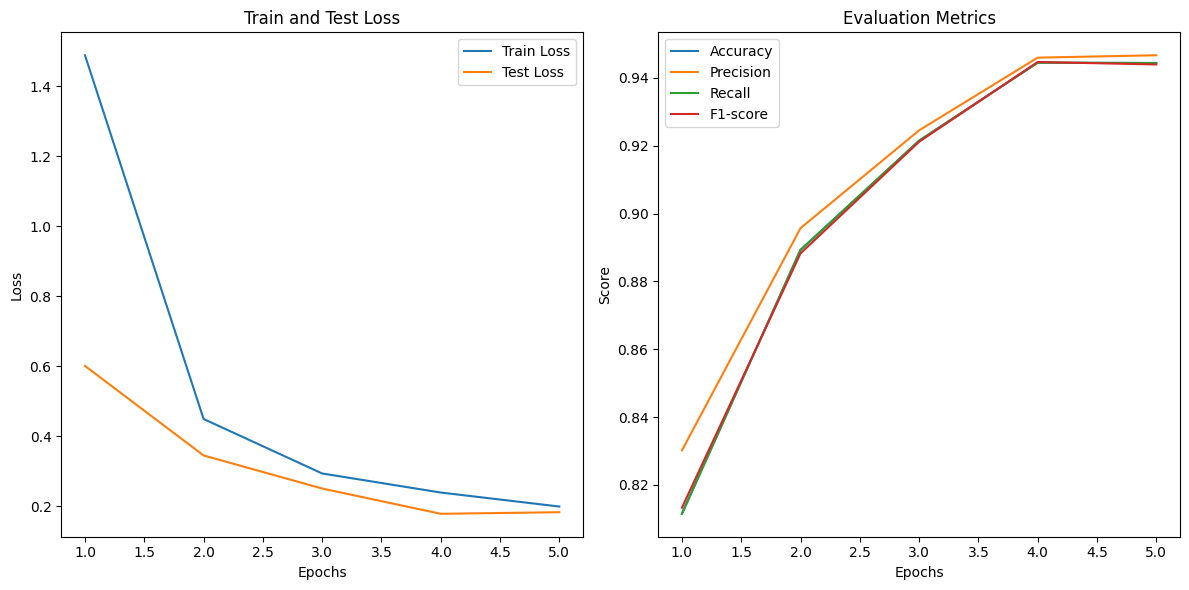

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Define Depthwise Separable Convolution Block
class DepthwiseSeparableConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DepthwiseSeparableConv, self).__init__()
        self.depthwise = nn.Conv2d(in_channels, in_channels, kernel_size=3, padding=1, groups=in_channels)
        self.pointwise = nn.Conv2d(in_channels, out_channels, kernel_size=1)

    def forward(self, x):
        return self.pointwise(self.depthwise(x))

# Define the Xception Model
class Xception(nn.Module):
    def __init__(self, num_classes=10):
        super(Xception, self).__init__()
        self.initial_conv = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.sep_conv1 = DepthwiseSeparableConv(32, 64)
        self.sep_conv2 = DepthwiseSeparableConv(64, 128)
        self.sep_conv3 = DepthwiseSeparableConv(128, 256)
        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(256, num_classes)

    def forward(self, x):
        x = torch.relu(self.initial_conv(x))
        x = torch.relu(self.sep_conv1(x))
        x = torch.relu(self.sep_conv2(x))
        x = torch.relu(self.sep_conv3(x))
        x = self.avg_pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# Load MNIST Dataset
transform = transforms.Compose([transforms.Resize((28, 28)), transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Training Function
def train_model(model, train_loader, test_loader, num_epochs=5):
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    train_losses = []
    test_losses = []
    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_list = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in tqdm(train_loader):
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        train_losses.append(running_loss / len(train_loader))

        # Validation
        model.eval()
        test_loss = 0.0
        all_preds = []
        all_labels = []
        with torch.no_grad():
            for images, labels in test_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                test_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
        test_losses.append(test_loss / len(test_loader))

        # Calculate Metrics
        all_preds = np.array(all_preds)
        all_labels = np.array(all_labels)
        accuracy = (all_preds == all_labels).mean()
        precision = precision_score(all_labels, all_preds, average='weighted')
        recall = recall_score(all_labels, all_preds, average='weighted')
        f1 = f1_score(all_labels, all_preds, average='weighted')

        # Append Metrics
        accuracy_list.append(accuracy)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)

        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

    # Compile metrics
    metrics = {
        "accuracy": accuracy_list,
        "precision": precision_list,
        "recall": recall_list,
        "f1_score": f1_list
    }
    return train_losses, test_losses, metrics

# Plotting Function
def plot_metrics(train_losses, test_losses, metrics):
    epochs = range(1, len(train_losses) + 1)

    # Loss Plot
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label="Train Loss")
    plt.plot(epochs, test_losses, label="Test Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Train and Test Loss")
    plt.legend()

    # Metrics Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, metrics["accuracy"], label="Accuracy")
    plt.plot(epochs, metrics["precision"], label="Precision")
    plt.plot(epochs, metrics["recall"], label="Recall")
    plt.plot(epochs, metrics["f1_score"], label="F1-score")
    plt.xlabel("Epochs")
    plt.ylabel("Score")
    plt.title("Evaluation Metrics")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Initialize and Train the Model
simple_xception_model = Xception()
print("Training  Xception Model:")
train_losses, test_losses, metrics = train_model(simple_xception_model, train_loader, test_loader, num_epochs=5)

# Plot the curves
plot_metrics(train_losses, test_losses, metrics)


Training  SENet Model:


100%|██████████| 938/938 [02:33<00:00,  6.09it/s]


Epoch [1/5], Train Loss: 1.6686, Test Loss: 1.3588, Accuracy: 0.5156, Precision: 0.5550, Recall: 0.5156, F1-score: 0.4950


100%|██████████| 938/938 [02:33<00:00,  6.10it/s]


Epoch [2/5], Train Loss: 1.3171, Test Loss: 1.2357, Accuracy: 0.5621, Precision: 0.5981, Recall: 0.5621, F1-score: 0.5562


100%|██████████| 938/938 [02:34<00:00,  6.08it/s]


Epoch [3/5], Train Loss: 1.1779, Test Loss: 1.0831, Accuracy: 0.6526, Precision: 0.6704, Recall: 0.6526, F1-score: 0.6372


100%|██████████| 938/938 [02:34<00:00,  6.08it/s]


Epoch [4/5], Train Loss: 1.0350, Test Loss: 0.9148, Accuracy: 0.7215, Precision: 0.7262, Recall: 0.7215, F1-score: 0.7173


100%|██████████| 938/938 [02:32<00:00,  6.14it/s]


Epoch [5/5], Train Loss: 0.8998, Test Loss: 0.8124, Accuracy: 0.7514, Precision: 0.7639, Recall: 0.7514, F1-score: 0.7423


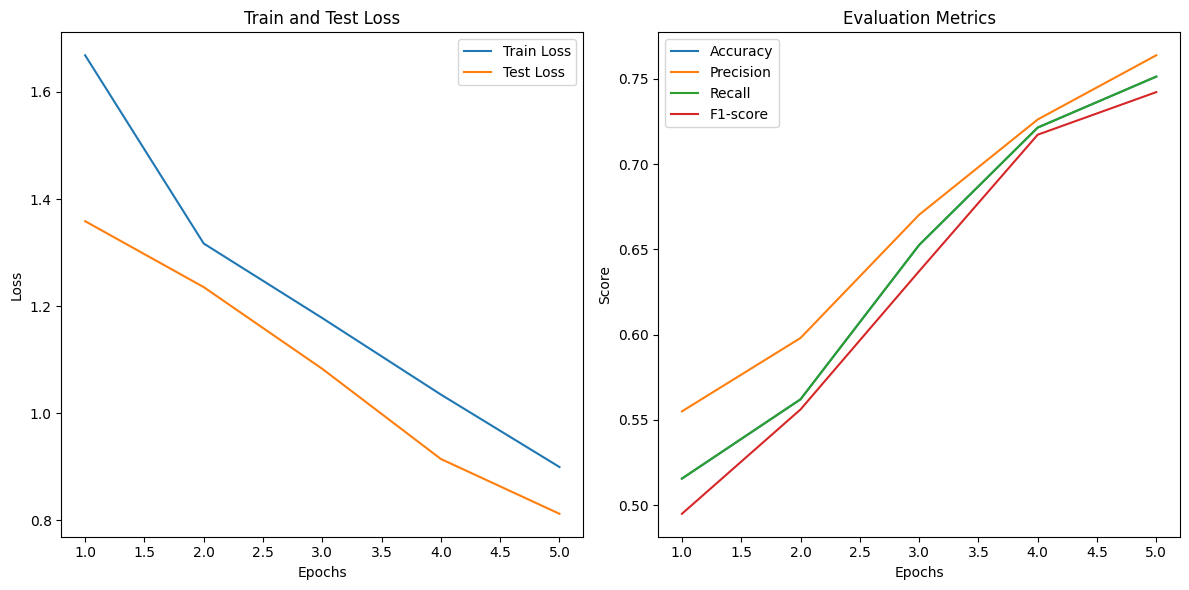

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Define Squeeze-and-Excitation Block
class SqueezeExcitationBlock(nn.Module):
    def __init__(self, in_channels, reduction=16):
        super(SqueezeExcitationBlock, self).__init__()
        self.fc1 = nn.Linear(in_channels, in_channels // reduction)
        self.fc2 = nn.Linear(in_channels // reduction, in_channels)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        batch_size, channels, _, _ = x.size()
        squeeze = x.view(batch_size, channels, -1).mean(dim=2)  # Squeeze
        excitation = self.fc1(squeeze).relu()                    # Excitation
        excitation = self.fc2(excitation)
        excitation = self.sigmoid(excitation).view(batch_size, channels, 1, 1)  # Scale
        return x * excitation  # Scale feature maps

# Define the SENet Model
class SENet(nn.Module):
    def __init__(self, num_classes=10):
        super(SENet, self).__init__()
        self.initial_conv = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.se_block = SqueezeExcitationBlock(32)
        self.conv = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(64, num_classes)

    def forward(self, x):
        x = torch.relu(self.initial_conv(x))
        x = self.se_block(x)  # Apply SE block
        x = torch.relu(self.conv(x))
        x = self.avg_pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# Load MNIST Dataset
transform = transforms.Compose([transforms.Resize((28, 28)), transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Training Function
def train_model(model, train_loader, test_loader, num_epochs=5):
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    train_losses = []
    test_losses = []
    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_list = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in tqdm(train_loader):
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        train_losses.append(running_loss / len(train_loader))

        # Validation
        model.eval()
        test_loss = 0.0
        all_preds = []
        all_labels = []
        with torch.no_grad():
            for images, labels in test_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                test_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
        test_losses.append(test_loss / len(test_loader))

        # Calculate Metrics
        all_preds = np.array(all_preds)
        all_labels = np.array(all_labels)
        accuracy = (all_preds == all_labels).mean()
        precision = precision_score(all_labels, all_preds, average='weighted')
        recall = recall_score(all_labels, all_preds, average='weighted')
        f1 = f1_score(all_labels, all_preds, average='weighted')

        # Append Metrics
        accuracy_list.append(accuracy)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)

        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

    # Compile metrics
    metrics = {
        "accuracy": accuracy_list,
        "precision": precision_list,
        "recall": recall_list,
        "f1_score": f1_list
    }
    return train_losses, test_losses, metrics

# Plotting Function
def plot_metrics(train_losses, test_losses, metrics):
    epochs = range(1, len(train_losses) + 1)

    # Loss Plot
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label="Train Loss")
    plt.plot(epochs, test_losses, label="Test Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Train and Test Loss")
    plt.legend()

    # Metrics Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, metrics["accuracy"], label="Accuracy")
    plt.plot(epochs, metrics["precision"], label="Precision")
    plt.plot(epochs, metrics["recall"], label="Recall")
    plt.plot(epochs, metrics["f1_score"], label="F1-score")
    plt.xlabel("Epochs")
    plt.ylabel("Score")
    plt.title("Evaluation Metrics")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Initialize and Train the Model
simple_senet_model = SENet()
print("Training  SENet Model:")
train_losses, test_losses, metrics = train_model(simple_senet_model, train_loader, test_loader, num_epochs=5)

# Plot the curves
plot_metrics(train_losses, test_losses, metrics)
